In [37]:
import matplotlib.pyplot as plt 
import random as rd
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, SVR, LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from time import sleep
from tqdm import tqdm, trange
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_recall_curve

df = pd.read_csv('../dataset/UserCarData.csv')

df.drop(['Sales_ID'], axis=1, inplace=True)

df_m = df.copy()

df_m = df_m[['sold', 'City', 'fuel', 'transmission', 'mileage', 'engine', 'km_driven', 'Region', 'max_power', 'State or Province', 'year']]
# df_m.drop(['Region', 'fuel', 'sold', 'owner', 'seller_type'], axis=1, inplace=True)

def encodage(df):
    label_encoder_sold = LabelEncoder()
    lbl = LabelEncoder()

    for col in df.select_dtypes('object'):
        df[col] = lbl.fit_transform(df[col])
    return df

df_m = encodage(df_m)
y = df_m['sold']
X = df_m.drop(['sold'], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

category_variables = X.select_dtypes('object').columns
continus_variables = X.select_dtypes(['int64', 'float64']).columns

c_pipe = make_pipeline(OneHotEncoder())
n_pipe = make_pipeline(RobustScaler())

preprocessor = make_column_transformer((c_pipe, category_variables),(n_pipe, continus_variables))

pipe = make_pipeline(preprocessor)

In [48]:
# SVM = make_pipeline(pipe, SVC())
randomForestClassifier = make_pipeline(pipe ,RandomForestClassifier(min_samples_leaf=5, 
                                        max_features='log2',max_depth=30, n_estimators=300))

# randomForestClassifier = make_pipeline(pipe,  AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_leaf=5, 
#                                         max_features='log2',max_depth=30, n_estimators=300)))
# decisionTreeClassifier = make_pipeline(pipe,  DecisionTreeClassifier())
# kNeighborsClassifier = make_pipeline(pipe,  KNeighborsClassifier())

dict_of_models = {
                  'randomForestClassifier': randomForestClassifier,
                #   'adaBoostClassifier': adaBoostClassifier,
                #   'DecisionTreeClassifier': decisionTreeClassifier,
                #   'kNeighborsClassifier': kNeighborsClassifier,
                 }

Model name randomForestClassifier:   0%|          | 0/1 [00:00<?, ?s/s]

[[1754   28]
 [ 295  295]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1782
           1       0.91      0.50      0.65       590

    accuracy                           0.86      2372
   macro avg       0.88      0.74      0.78      2372
weighted avg       0.87      0.86      0.85      2372



Model name randomForestClassifier: 100%|██████████| 1/1 [00:37<00:00, 37.67s/s]

0.45447159512968494


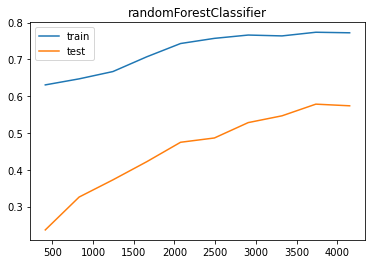

In [49]:

from time import sleep
from tqdm import tqdm, trange

def evaluation(model, name):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, 
    scoring='f1', train_sizes=np.linspace(0.1,1,10))
    print(val_score.mean())

    plt.figure()
    plt.title(name)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='test')
    plt.legend()

with tqdm(dict_of_models.items(), unit="s") as pbar:
    for name, model in pbar:
        pbar.set_description(f"Model name {name}")
        evaluation(model, name)
        # pbar.set_postfix(divisors=)
        sleep(0.1)
# 0.70      0.45      0.55       394
# 0.91      0.41      0.57
#  0.83      0.58      0.68

In [35]:
randomForestClassifier.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('pipeline-1',
                                                     Pipeline(steps=[('onehotencoder',
                                                                      OneHotEncoder())]),
                                                     Index([], dtype='object')),
                                                    ('pipeline-2',
                                                     Pipeline(steps=[('standardscaler',
                                                                      StandardScaler())]),
                                                     Index(['City', 'fuel', 'transmission', 'mileage', 'engine', 'km_driven',
          'Region', 'max_power'],
         dtype='object'))]))])),
  ('randomforestclassifier',
   RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=5,
                          n_estimators=300))],


{'randomforestclassifier__n_estimators': 800, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__bootstrap': True}
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1188
           1       0.87      0.34      0.48       394

    accuracy                           0.82      1582
   macro avg       0.84      0.66      0.69      1582
weighted avg       0.83      0.82      0.79      1582

Model final_estimator
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1188
           1       0.50      0.61      0.55       394

    accuracy                           0.75      1582
   macro avg       0.68      0.70      0.69      1582
weighted avg       0.77      0.75      0.76      1582



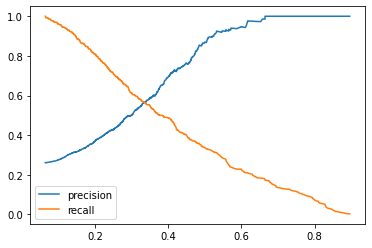

In [56]:
hyper_params = {'randomforestclassifier__bootstrap': [True, False],
 'randomforestclassifier__max_depth': [20, 30, 40, 50],
 'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
 'randomforestclassifier__min_samples_leaf': [3, 4,5],
 'randomforestclassifier__min_samples_split': [2, 5, 10],
 'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000]}


grid = RandomizedSearchCV(randomForestClassifier, hyper_params, scoring='recall', cv=4, n_iter=1)
# grid = RandomizedSearchCV(randomForestClassifier, hyper_params, scoring='recall', cv=4, n_iter=50)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:,1])

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

def model_final(model, X, threshold=0):
    return model.predict_proba(X)[:,1] > threshold

y_pred = model_final(grid.best_estimator_, X_test, threshold=0.3)  

print('Model final_estimator')
print(classification_report(y_test, y_pred))

In [1]:
import matplotlib.pyplot as plt 
import random as rd
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, SVR, LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from time import sleep
from tqdm import tqdm, trange
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('../dataset/UserCarData.csv')

df.drop(['Sales_ID'], axis=1, inplace=True)

df_m = df.copy()

# df_m.drop(['selling_price'], axis=1, inplace=True)
# df_m.drop(['Region', 'fuel', 'sold', 'owner', 'seller_type'], axis=1, inplace=True)

def encodage(df):
    label_encoder_sold = LabelEncoder()
    lbl = LabelEncoder()

    for col in df.select_dtypes('object'):
        df[col] = lbl.fit_transform(df[col])
    return df

df_m = encodage(df_m)
y = df_m['selling_price']
X = df_m.drop(['selling_price'], axis=1)

Index(['year', 'seller_type', 'transmission', 'engine', 'max_power'], dtype='object')

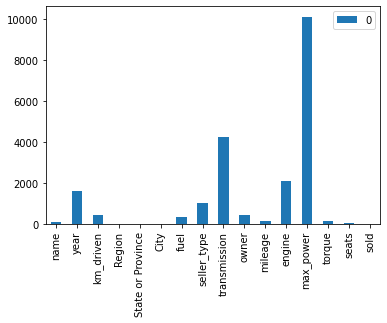

In [3]:
# Feature selection

from sklearn.feature_selection import chi2, mutual_info_classif, f_regression, f_classif, mutual_info_regression, SelectPercentile, SelectKBest, SelectFromModel, RFE, RFECV

f_stat, p_value = f_regression(X, y)
# print(p_value)

# f_stat1 = mutual_info_regression(X, y)
# print(f_stat1)
pd.DataFrame(np.array(f_stat), index=X.columns).plot.bar()

selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)
X.columns[selector.get_support()]

# selector = SelectFromModel(SGD.steps[1][1], threshold='median')
# selector.fit_transform(X, y)
# print(X.columns[selector.get_support()])


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

category_variables = X.select_dtypes('object').columns
continus_variables = X.select_dtypes(['int64', 'float64']).columns

c_pipe = make_pipeline(OneHotEncoder())
n_pipe = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((c_pipe, category_variables),(n_pipe, continus_variables))

pipe = make_pipeline(preprocessor)

In [4]:

SGD = make_pipeline(pipe,  SGDRegressor())
SGD = make_pipeline(pipe,  LinearSVC())
tree = make_pipeline(pipe,  DecisionTreeRegressor())
# Bagging2 = make_pipeline(pipe,  BaggingRegressor(base_estimator=SGDRegressor(), n_estimators=10))
bagging_tree = make_pipeline(pipe,  BaggingRegressor(base_estimator=SGDRegressor(), n_estimators=10))
# Gradient = make_pipeline(pipe,  GradientBoostingRegressor())

# dict_of_models = {'SGD': SGD, 'Tree': tree,'Bagging2': Bagging2, 'Bagging3': Bagging3, 'Gradient': Gradient}
dict_of_models = {'SGD': SGD ,'Tree': tree, 'bagging_tree': bagging_tree }

# selector = SelectFromModel(SGD.steps[1][1], threshold='median')
# selector.fit(X, y)
# print(X.columns[selector.get_support()])

selector = SelectFromModel(SGD.steps[1][1], threshold="median")
selector.fit(X, y)
print(X.columns[selector.get_support()])


# selector = RFECV(SGD.steps[1][1], step=5, min_features_to_select=4, cv=5)
# selector.fit(X, y)
# print(selector.ranking_)
# print(selector.cv_results_)

# def evaluation_regressor(model, name):
#     model.fit(X_train, y_train)

#     if hasattr(model.steps[1][1], 'feature_importances_'):
#         pd.DataFrame(model.steps[1][1].feature_importances_, index=X.columns).plot.bar()
#     elif hasattr(model.steps[1][1], 'coef_'):
#         pd.DataFrame(model.steps[1][1].coef_, index=X.columns).plot.bar()
    
#     y_pred = model.predict(X_test)

#     print('model.score', model.score(X_test, y_test))

#     N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1,1,10))
#     print('val_score', val_score.mean())
#     print('MAE', mean_absolute_error(y_test, y_pred)) 
#     print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred))) 
#     print('MSE', mean_squared_error(y_test, y_pred))  
#     print('MEDIANE ABSOLUTE ERROR', median_absolute_error(y_test, y_pred))

#     plt.figure()
#     plt.title(name)
#     plt.plot(N, train_score.mean(axis=1), label='train')
#     plt.plot(N, val_score.mean(axis=1), label='test')
#     plt.legend()
#     print('-------')
# errr_hist = np.abs(y_pred - y_test)
# errr_hist_sq = mean_squared_error(y_test, y_pred)


# with tqdm(dict_of_models.items(), unit="s") as pbar:
#     i = 0
#     for name, model in pbar:
#         pbar.set_description(f"Model name {name}")
#         evaluation_regressor(model, name)
#         # pbar.set_postfix(')
#         i += 1
#         sleep(0.1)


Index(['name', 'Region', 'State or Province', 'fuel', 'seller_type',
       'transmission', 'mileage', 'engine'],
      dtype='object')


/home/titi/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'baggingregressor__base_estimator__power_t': 0.2, 'baggingregressor__base_estimator__max_iter': 1000, 'baggingregressor__base_estimator__eta0': 0.05, 'baggingregressor__base_estimator__epsilon': 0.2, 'baggingregressor__base_estimator__alpha': 0.001}
0.6666157230367387
0.6649048148771692
MAE 280302.835199106
RMSE 470058.23490638094
MSE 220954744203.30243
MEDIANE ABSOLUTE ERROR 167557.6777095142
-------


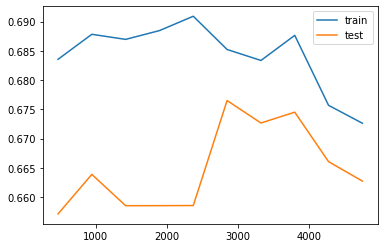

In [74]:
hyper_params = {
    'baggingregressor__base_estimator__alpha': [0.0001, 0.001, 0.01],
    'baggingregressor__base_estimator__epsilon': [0.1, 0.2, 0.3],
    'baggingregressor__base_estimator__eta0': [0.01, 0.02, 0.05],
    'baggingregressor__base_estimator__max_iter': [1000, 1500],
    'baggingregressor__base_estimator__power_t': [0.25, 0.20, 0.30]
}

grid = RandomizedSearchCV(bagging_tree, hyper_params, scoring='neg_median_absolute_error', cv=4, n_iter=50)

grid.fit(X_train, y_train)

print(grid.best_params_)


y_pred = grid.predict(X_test)

model_final = grid.best_estimator_

def evaluation_regressor(model_final):
    model_final.fit(X_train, y_train)
    y_pred = model_final.predict(X_test)

    print(model_final.score(X_test, y_test))

    N, train_score, val_score = learning_curve(model_final, X_train, y_train, cv=4, train_sizes=np.linspace(0.1,1,10))
    print(val_score.mean())
    print('MAE', mean_absolute_error(y_test, y_pred)) 
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred))) 
    print('MSE', mean_squared_error(y_test, y_pred))  
    print('MEDIANE ABSOLUTE ERROR', median_absolute_error(y_test, y_pred))  

    # plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='test')
    plt.legend()
    print('-------')

evaluation_regressor(model_final)


## Idea feature selection : 

- Group engine and max_power => power engine
- Creation grouped frequency table
- Remove : city, state, region, name, 
- Remove certain type of seats